
# Домашнее задание "Визуализация данных и описательная статистика"

- Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.
- Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.
- Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).

## Информация по набору

Age: The age of the individuals in the dataset, representing their chronological age in years.
Gender: The gender identification of the individuals, indicating their gender or gender identity.
Education Level: The highest level of education attained by the individuals, indicating their educational qualifications or degree.
Job Title: The occupation or job title of the individuals, specifying their professional role or position.
Years of Experience: The number of years of professional experience accumulated by the individuals in their respective fields.
Salary: The income level or salary earned by the individuals, denoting their monetary compensation.
Country: The country of residence or origin of the individuals, providing geographical information.
Race: The racial background or ethnicity of the individuals, reflecting their specific racial or ethnic group.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('https://raw.githubusercontent.com/catprokhorova/HW_datasets/main/EDA_1/salary_dataset.csv')
df = pd.read_csv('salary_dataset.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [17]:
# Общая информация о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [20]:
# Базовые статистики
df.describe(include='all')

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
count,6704.000000,6702.000000,6702,6701,6702,6701.000000,6699.000000,6704,6704
unique,NaN,NaN,3,7,193,NaN,NaN,5,10
top,NaN,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN,USA,White
freq,NaN,NaN,3674,2267,518,NaN,NaN,1360,1968
mean,3351.500000,33.620859,NaN,NaN,NaN,8.094687,115326.964771,NaN,NaN
std,1935.422435,7.614633,NaN,NaN,NaN,6.059003,52786.183911,NaN,NaN
min,0.000000,21.000000,NaN,NaN,NaN,0.000000,350.000000,NaN,NaN
25%,1675.750000,28.000000,NaN,NaN,NaN,3.000000,70000.000000,NaN,NaN
50%,3351.500000,32.000000,NaN,NaN,NaN,7.000000,115000.000000,NaN,NaN
75%,5027.250000,38.000000,NaN,NaN,NaN,12.000000,160000.000000,NaN,NaN


## Заполнение пропусков

In [65]:
print("дo:")
print(df.isnull().sum())

# Заполнение числовых пропусков медианой
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].median())

# Заполнение категориальных пропусков модой
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Job Title'] = df['Job Title'].fillna(df['Job Title'].mode()[0])
df['Education Level'] = df['Education Level'].fillna(df['Education Level'].mode()[0])

# Проверка пропусков после заполнения
print("\nпосле:")
print(df.isnull().sum())

дo:
Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

после:
Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64


## Визуализация распределения данных

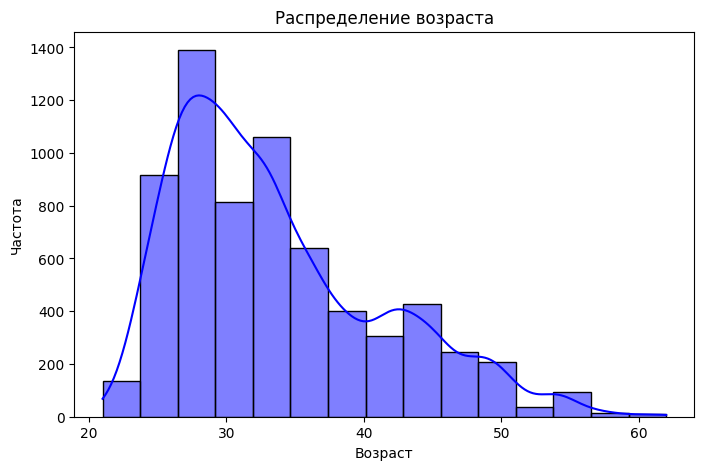

In [66]:
# Распределение возраста (Age)

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=15, color='blue')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

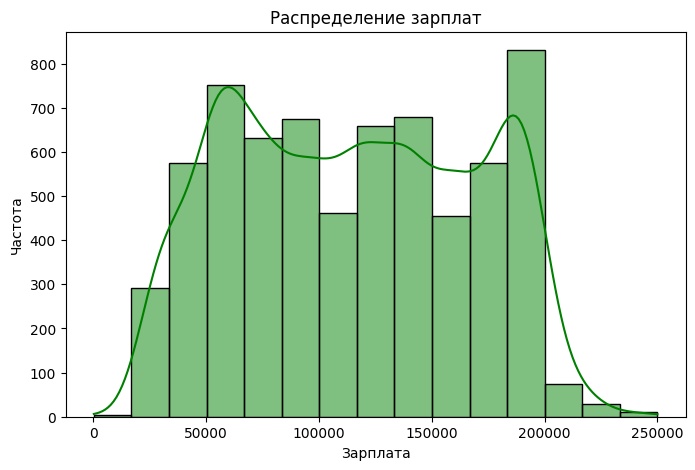

In [67]:
# Распределение зарплат (Salary)

plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=True, bins=15, color='green')
plt.title('Распределение зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.show()

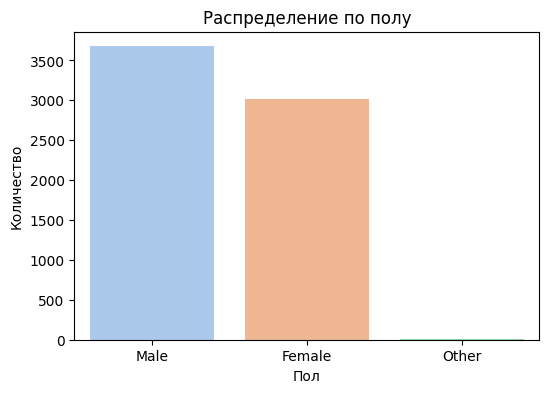

In [68]:
# Распределение по полу (Gender)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Gender', palette='pastel')
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

## Поиск выбросов

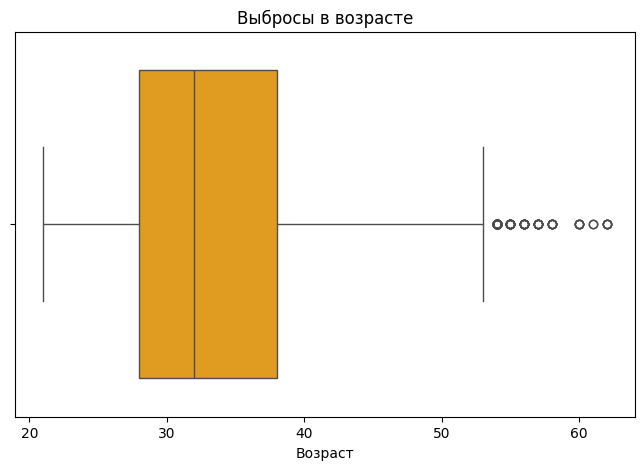

In [69]:
# Выбросы в возрасте (Age)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Age', color='orange')
plt.title('Выбросы в возрасте')
plt.xlabel('Возраст')
plt.show()

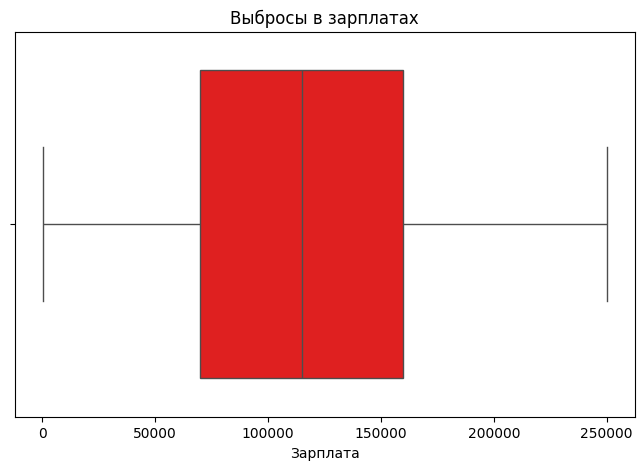

In [70]:
# Выбросы в зарплатах (Salary)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Salary', color='red')
plt.title('Выбросы в зарплатах')
plt.xlabel('Зарплата')
plt.show()

## Вопросы и гипотезы

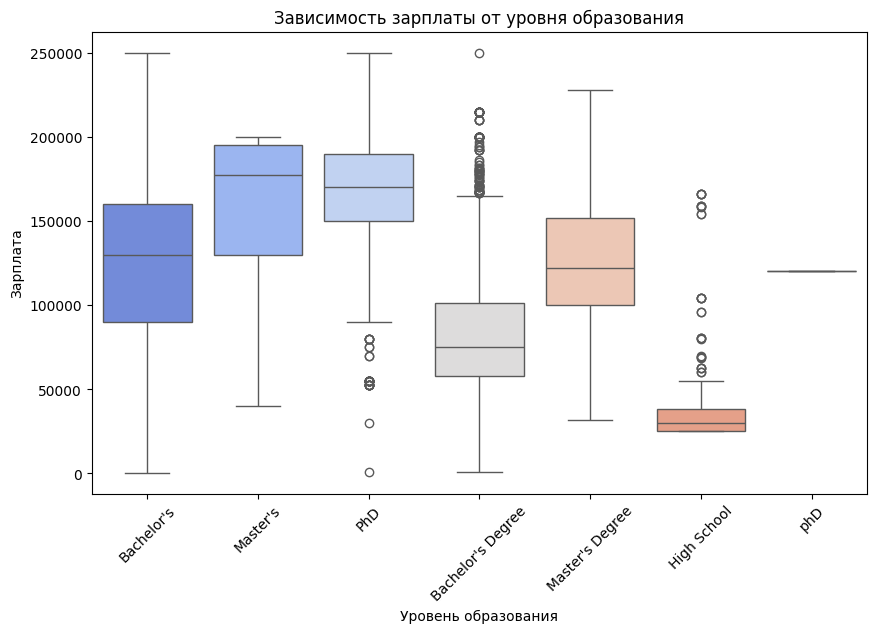

In [71]:
# Вопрос 1: Зависит ли зарплата от уровня образования?

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education Level', y='Salary', hue="Education Level", palette='coolwarm')
plt.title('Зависимость зарплаты от уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Зарплата')
plt.xticks(rotation=45)
plt.show()

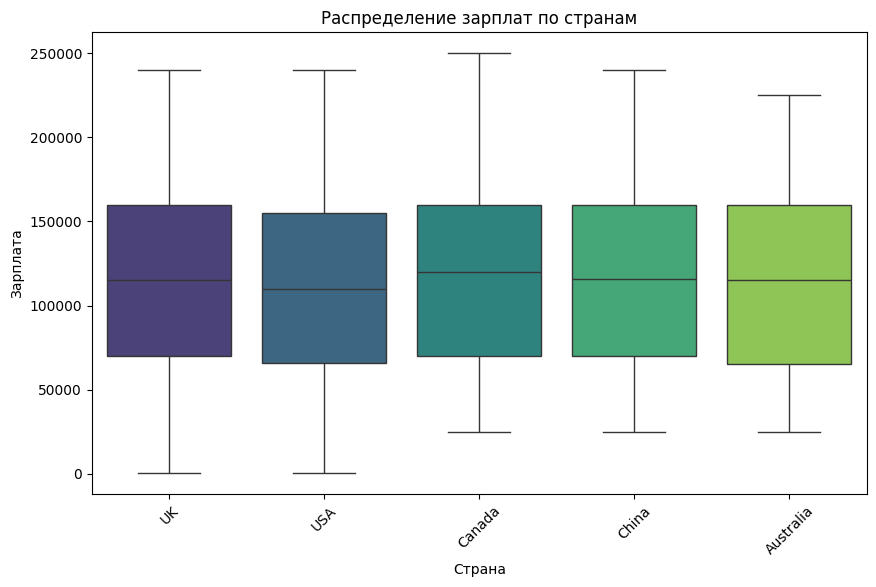

In [72]:
# Вопрос 2: Как распределяются зарплаты по странам?

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Country', y='Salary', hue="Country", palette='viridis')
plt.title('Распределение зарплат по странам')
plt.xlabel('Страна')
plt.ylabel('Зарплата')
plt.xticks(rotation=45)
plt.show()

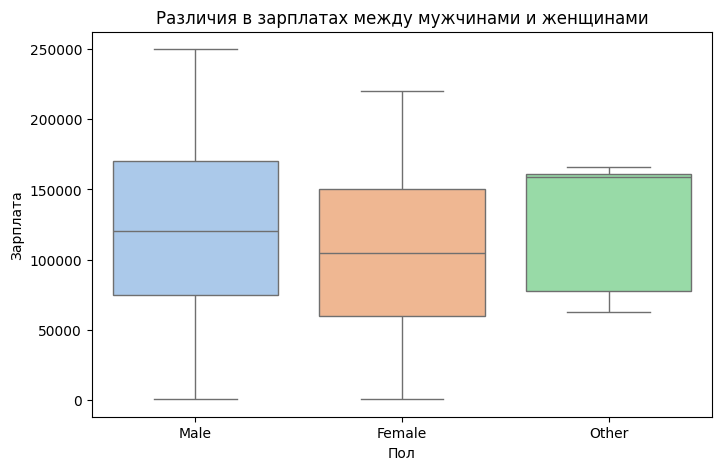

In [73]:
# Вопрос 3: Есть ли различия в зарплатах между мужчинами и женщинами?

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Salary', hue="Gender", palette='pastel')
plt.title('Различия в зарплатах между мужчинами и женщинами')
plt.xlabel('Пол')
plt.ylabel('Зарплата')
plt.show()

In [79]:
# И много вас таких бесполых, просто любопытно...

# Получение распределения
value_counts = df['Gender'].value_counts(dropna=False)
print(f"Распределение категорий:\n{value_counts}")

Распределение категорий:
Gender
Male      3676
Female    3014
Other       14
Name: count, dtype: int64


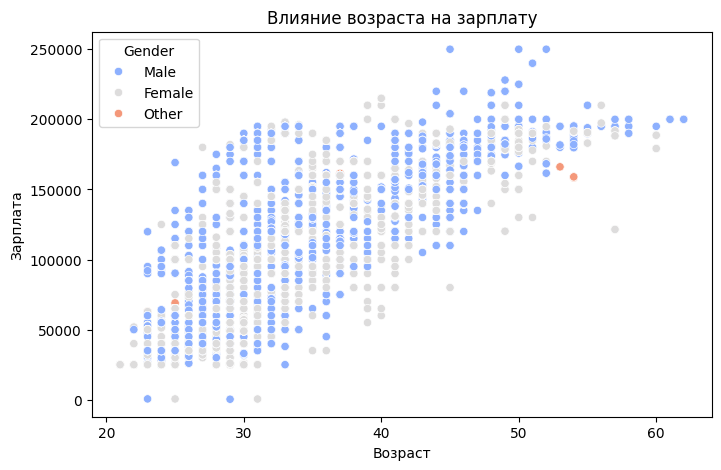

In [ ]:
# Вопрос 4: Как возраст влияет на зарплату среди мужчит и женщин?

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Salary', hue='Gender', palette='coolwarm')
plt.title('Влияние возраста на зарплату среди мужчин и женщин')
plt.xlabel('Возраст')
plt.ylabel('Зарплата')
plt.show()